# **Contexto:**

La tarea es limpiar y explorar los datos para una compañía de tecnología emergente que desarrolla aplicaciones móviles. La empresa quiere mejorar la experiencia del usuario y aumentar la retención de usuarios en sus aplicaciones. Han recolectado datos sobre el uso de sus aplicaciones y quieren entender mejor cómo los usuarios interactúan con sus productos.

# Requisitos:

1. Limpieza de Datos.

2. Exploración de Datos.

- Diccionario de Datos:
    * user_id: Identificación única del usuario.
    * app_version: Versión de la aplicación usada.
    * platform: Plataforma del dispositivo (Android, iOS).
    * session_duration: Duración de la sesión en minutos.
    * number_of_sessions: Número de sesiones en un día.
    * country: País del usuario.
    * user_feedback: Puntuación de la experiencia del usuario (1-5).


## *Codigo para generar los datos*


In [42]:
import pandas as pd
import numpy as np
import random

# Configuramos la semilla para reproducibilidad
np.random.seed(42)

# Generamos los datos sintéticos
user_id = range(1, 301)
app_version = np.random.choice(['1.0', '1.1', '1.2', '1.3'], 300)
platform = np.random.choice(['Android', 'iOS'], 300)
session_duration = np.random.randint(1, 180, 300)
number_of_sessions = np.random.randint(1, 20, 300)
country = np.random.choice(['USA', 'Canada', 'Mexico', 'UK', 'Germany', 'France', 'Spain', 'Italy'], 300)
user_feedback = np.random.randint(1, 6, 300)

# Creamos el DataFrame
data = pd.DataFrame({
    'user_id': user_id,
    'app_version': app_version,
    'platform': platform,
    'session_duration': session_duration,
    'number_of_sessions': number_of_sessions,
    'country': country,
    'user_feedback': user_feedback
})

# Guardamos los datos en un archivo CSV
data.to_csv('user_app_data.csv', index=False)
print("Datos generados y guardados en 'user_app_data.csv'")

Datos generados y guardados en 'user_app_data.csv'


*Todo lo anterior corresponde puntualmente a lo planteado en el ejercicio*

In [43]:
# Cargar datos desde un archivo CSV
df = pd.read_csv('/content/user_app_data.csv')

# Mostrar las primeras 10 filas del DataFrame
print(df.head(10))

   user_id  app_version platform  session_duration  number_of_sessions  \
0        1          1.2  Android               109                  11   
1        2          1.3  Android               116                  17   
2        3          1.0  Android                94                  13   
3        4          1.2      iOS                47                   1   
4        5          1.2      iOS                99                   2   
5        6          1.3  Android                55                   9   
6        7          1.0      iOS               168                   3   
7        8          1.0      iOS                52                   1   
8        9          1.2      iOS               144                  16   
9       10          1.1      iOS                13                   6   

   country  user_feedback  
0   France              1  
1       UK              2  
2   France              5  
3   Canada              4  
4   Canada              3  
5  Germany       

# **1) Limpieza de Datos:**

El primer paso en este proceso es usar Python para limpiar los datos y dejarlos listos para el análisis. Deben:



## a) Identificar y abordar cualquier valor duplicado.


In [44]:
# Consultar si hay duplicados, cuántos
print("a. ¿Hay duplicados en el DataFrame?")
print(df.duplicated().any())
print("\nb. ¿Cuántos duplicados hay en el DataFrame?")
print(df.duplicated().sum())

# Eliminar duplicados
# df = df.drop_duplicates()
# lo dejo como código comentado, ya que no existen duplicados en el DataFrame

a. ¿Hay duplicados en el DataFrame?
False

b. ¿Cuántos duplicados hay en el DataFrame?
0


* No hay valores duplicados

## b) Identificar y abordar cualquier dato que falte en este conjunto de datos. Trátenlos de forma adecuada. Incluyan una breve descripción en el método que usan para tratar con los valores que faltan junto con una justificación para el uso de ese método.


In [45]:
# Revisar en que variables hay datos nulos o faltantes y observar su porcentaje para determinar qué hacer
porcentaje_nulos = (df.isnull().sum() / df.shape[0]) * 100
porcentaje_nulos_positivos = porcentaje_nulos[porcentaje_nulos > 0]

print(df.isnull().sum()[df.isnull().sum() > 0],"\n")
print(porcentaje_nulos_positivos)

Series([], dtype: int64) 

Series([], dtype: float64)


In [46]:
# como la respuesta anterior me dio unas listas vacías, supondría que no hay nulos, pero para estar seguros verifico con lo siguiente
print(df.isnull().sum(),'\n')   # También se podría revisar         print(df.isna().sum())          pero es lo mismo

# También me gustaría verificar si existe la posibilidad de que en vez de nulos, null o NaN, allán celdas vacías o con espacios
print(df.isin(['', ' ']).sum(),'\n')

# Y por si las moscas, revisaré si el df tiene datos
print(f"El DataFrame tiene {df.shape[0]} filas y {df.shape[1]} columnas")

user_id               0
app_version           0
platform              0
session_duration      0
number_of_sessions    0
country               0
user_feedback         0
dtype: int64 

user_id               0
app_version           0
platform              0
session_duration      0
number_of_sessions    0
country               0
user_feedback         0
dtype: int64 

El DataFrame tiene 300 filas y 7 columnas


* No hay valores nulos

## c) Asegurarse de que todas las columnas coincidan con los tipos de datos enumerados en el diccionario de datos.


In [47]:
# Para asegurar esto se revisaría los tipos de datos
print(df.dtypes)

user_id                 int64
app_version           float64
platform               object
session_duration        int64
number_of_sessions      int64
country                object
user_feedback           int64
dtype: object


* Parece que cumple con los tipos de datos requeridos en el diccionario inicial

## d) Identificar y abordar cualquier inconsistencia en los valores categóricos (ejemplo: android, Android, ANDROID).


In [48]:
# Verificar valores únicos y cantidad de una columna
print(df['platform'].value_counts())

platform
iOS        163
Android    137
Name: count, dtype: int64


* No parece haber inconsistencias en los valores categóricos de la columna platform

## e) Identificar y abordar cualquier punto de datos inapropiados o inusuales (ejemplo: tiempo de uso de 10000 horas en una semana).

Si bien, en los requerimientos del ejercicio está especificado lo siguiente
- session_duration: Duración de la sesión en minutos.
- number_of_sessions: Número de sesiones en un día.

Se podría entender que, la cantidad de minutos invertidos en una semana equivaldrían a multiplicar la duración de sesión en minutos por el número de sesiones por día por 7 días que tiene la semana

In [49]:
# Agregar primero una columna para saber la cantidad de minutos totales por semana
df['total_minutes_week'] = df['session_duration'] * df['number_of_sessions'] * 7

# Agregar la cantidad de horas por semana, pero que me dé los números enteros para poder revisar valores
df['total_hours_week'] = df['total_minutes_week'] // 60

# Obtener los valores únicos y ordenarlos
horas_muestra = df['total_hours_week'].unique()
horas_muestra = sorted(horas_muestra, reverse=True)  # Ordenar de mayor a menor

# Mostrar el resultado
print(horas_muestra)

[363, 351, 339, 332, 329, 325, 319, 317, 312, 311, 310, 305, 304, 300, 296, 292, 291, 290, 287, 281, 277, 274, 272, 269, 268, 251, 248, 243, 241, 236, 233, 230, 229, 226, 223, 222, 218, 212, 210, 209, 207, 205, 204, 203, 201, 198, 197, 195, 194, 191, 190, 187, 186, 184, 183, 179, 178, 175, 173, 171, 170, 169, 166, 165, 164, 163, 158, 155, 152, 151, 150, 147, 146, 145, 142, 139, 138, 136, 135, 133, 127, 126, 124, 123, 122, 120, 119, 115, 113, 112, 110, 109, 108, 106, 105, 102, 101, 100, 98, 97, 95, 94, 93, 92, 91, 89, 85, 84, 82, 81, 80, 79, 77, 75, 74, 73, 72, 71, 70, 68, 66, 65, 64, 63, 62, 61, 60, 58, 57, 56, 55, 52, 51, 49, 47, 46, 45, 43, 42, 41, 40, 39, 38, 37, 36, 35, 34, 33, 32, 30, 29, 27, 26, 24, 23, 22, 21, 20, 19, 18, 17, 16, 15, 14, 13, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1, 0]


In [53]:
# Si bien se obtuvieron la cantidad de horas a la semana, para verificar que estos números tengan lógica, se debería revisar algunos datos reales
# Cantidad de horas que tiene una semana
df['c_total_hours_week'] = 7 * 24

# Si suponemos que, se duerme 8 horas, el tiempo real de "actividad" sería otro
df['c_r_total_hours_week'] = 7 * (24-8)

# Verificar si hay datos que no cumplan condiciones "reales"
df['verification_value'] = (df['total_hours_week'] <= df['c_r_total_hours_week'])

# Mostrar las columnas de interés
df[['total_minutes_week','total_hours_week', 'c_r_total_hours_week', 'c_total_hours_week', 'verification_value']]

,total_minutes_week,total_hours_week,c_r_total_hours_week,c_total_hours_week,verification_value
0,8393,139,112,168,False
1,13804,230,112,168,False
2,8554,142,112,168,False
3,329,5,112,168,True
4,1386,23,112,168,True
...,...,...,...,...,...
295,924,15,112,168,True
296,4956,82,112,168,True
297,455,7,112,168,True
298,5110,85,112,168,True


In [51]:
# Verificar valores únicos y cantidad de la verificación para identificar los "errores"
print(df['verification_value'].value_counts())


verification_value
True     184
False    116
Name: count, dtype: int64


### *Análisis*
Al revisar datos inapropiados o inusuales, en este caso puntual, porque cuando se vuelva a correr el código va a cambiar los datos.
- En este caso, de 300 datos, 116 parecen no tener consistencia o tener un significado real.

Opciones:
1. Si fueran datos reales, supondría que tocaría corregir, posiblemente errores de digitación o de las herramientas, en el código siguiente, supondría que, la duración de la sesión no está en minutos, sino directamente en horas, incluso en segundos
2. En este caso puntual, supondría que se debería de corregir desde el inicio, al punto tal de que, haya un factor o estructura de control, donde total_minutes_week sea menor al límite 6.720, viene de multiplicar 60 minutos que tiene una hora, por 112 horas que es el límite máximo real de conexión



# **2) Exploración de Datos:**

El siguiente paso es completar una exploración de los datos usando Python. Esto debe incluir:



## a) Dos tipos diferentes de visualizaciones exploratorias univariantes. Cada visualización debe incluir una breve interpretación dentro del archivo de código.


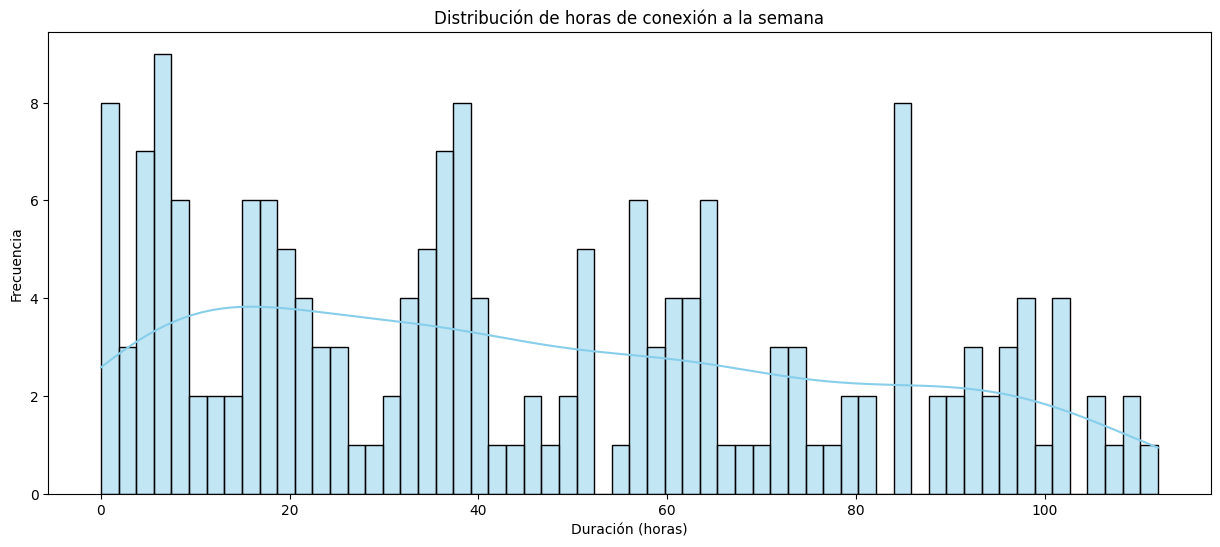

In [68]:
# Distribución del total de horas semanales de conexión, pero solo de aquellas que cumplen condición de ser "posibles"
import matplotlib.pyplot as plt
import seaborn as sns

df2 = df.copy()
df2 = df2[df2['verification_value'] != False]

plt.figure(figsize=(15, 6))
sns.histplot(df2['total_hours_week'], bins=60, kde=True, color="skyblue")
plt.title('Distribución de horas de conexión a la semana')
plt.xlabel('Duración (horas)')
plt.ylabel('Frecuencia')
plt.show()

### *Análisis*
Según lo observado, la distribución graficada de la columna total_hours_week, no hay algúna tendencia que sea notoria, tampoco algún tipo de distribución (como normal u otra), si podría mirarse que, hay picos puntuales muy marcados

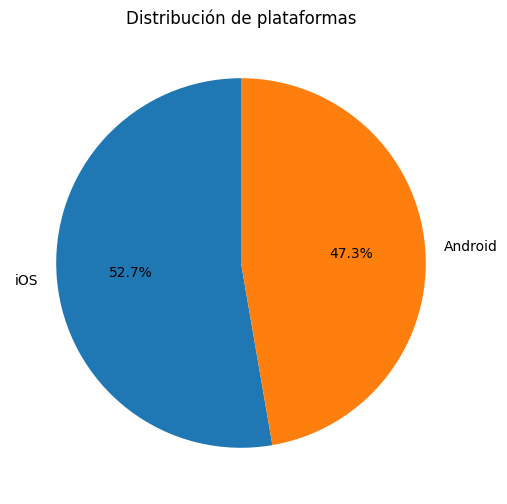

In [67]:
# grafico torta de plataforma
plt.figure(figsize=(15, 6))
df2['platform'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Distribución de plataformas')
plt.ylabel('')
plt.show()

### *Análisis*
Según lo observado, la mayoría de usuarios tiene plataforma iOS

## b) Dos tipos diferentes de visualizaciones exploratorias multivariantes. Cada visualización debe incluir una breve interpretación dentro del archivo de código.

In [84]:
df2['platform'].value_counts()

,count
platform,
iOS,97
Android,87


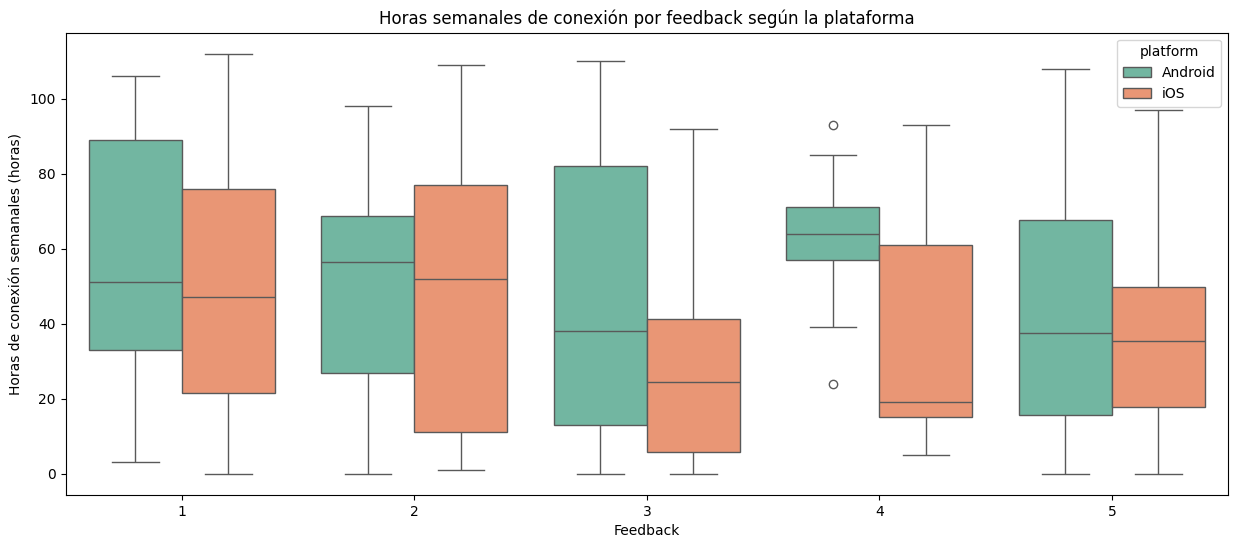

In [83]:
plt.figure(figsize=(15, 6))
sns.boxplot(x='user_feedback', y='total_hours_week', hue='platform', data=df2, palette='Set2')
plt.title('Horas semanales de conexión por feedback según la plataforma')
plt.xlabel('Feedback')
plt.ylabel('Horas de conexión semanales (horas)')
plt.show()

In [91]:
# Crear tabla resumen con groupby
summary_table = df2.groupby(['user_feedback', 'platform'])['total_hours_week'].agg(['mean', 'min', 'max', 'count']).round(1)

# Mostrar la tabla
summary_table

mean  min  max  count
user_feedback platform                       
1             Android   54.7    3  106     25
              iOS       49.9    0  112     19
2             Android   48.7    0   98     18
              iOS       49.4    1  109     25
3             Android   50.0    0  110     15
              iOS       28.8    0   92     20
4             Android   61.7   24   93      9
              iOS       35.8    5   93     17
5             Android   44.1    0  108     20
              iOS       36.8    0   97     16

### *Análisis*
Revisando la diferencia entre la cantidad de usuarios por plataforma, solo 10 se podría suponer que, por un lado pareciera que los usuarios de Android tienden a pasar más tiempo de conexión a la semana que los usuarios de iOS (por la mediana y el peso de algunos gráficos hacía arriba), también que los datos en cualquier nivel de feedback con plataforma suelen a ser bastante dispersos las barras de los datos extremos están bastante lejos de el q1 o el q3.

Al mirar la cantidad de usuarios que responden a un nivel del feedback por plataforma para determinar si hay alguna plataforma en la cual el feedback sea mayor, pareciera que en nivel más bajo del feedback inferior, son usuarios que permanecen más tiempo, comparado con los del nivel más alto del feedback, tienen menores tiempos de conexión. También parece haber alguna tendencia en que los usuarios que más tiempo de conexión tienen son los de la plataforma Android



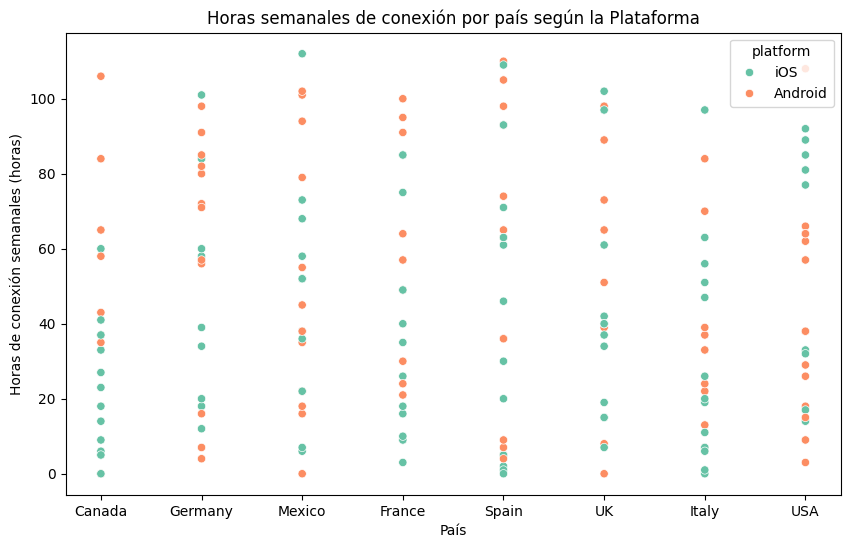

In [81]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='country', y='total_hours_week', hue='platform', data=df2, palette='Set2')
plt.title('Horas semanales de conexión por país según la Plataforma')
plt.xlabel('País')
plt.ylabel('Horas de conexión semanales (horas)')
plt.show()

### *Análisis*
En países como Canada y UK los usuarios de la plataforma iOS parecen ser los que tienen menor tiempo en horas de conexión semanales, mientras que en USA los usuarios de plataforma iOS son los que tienen mayor tiempo en horas de conexión semanales.
Mientras que, en Canada y Germany, la tendencia es de que los usuarios con plataforma Android tengan más tiempo de conexión semanal
